# SECTION 0: LIBRARY IMPORTS & PUBLICATION-QUALITY CONFIGURATION


## Section 0: Library Imports & Publication-Quality Configuration

**Standards Compliance:**
- IEEE Transactions style guide
- ACM SIGCHI formatting requirements
- Springer LNCS specifications

**Visualization Quality:**
- 300 DPI resolution (print quality)
- Vector formats (SVG/PDF) for scalability
- Color-blind friendly palettes (Wong 2011)
- Professional font hierarchy (IEEE standard)

In [19]:
# CORE LIBRARIES
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
import json
from datetime import datetime, timedelta
import sys
import os

# VISUALIZATION 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

# STATISTICAL ANALYSIS
from scipy import stats
from scipy.stats import (
    pointbiserialr, chi2_contingency, kstest, 
    normaltest, shapiro, mannwhitneyu
)

# TEXT ANALYSIS
try:
    from textblob import TextBlob
    TEXTBLOB_AVAILABLE = True
except ImportError:
    print("TextBlob not available. Install: pip install textblob")
    TEXTBLOB_AVAILABLE = False

from sklearn.feature_extraction.text import TfidfVectorizer

# MACHINE LEARNING (for EDA)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder

# CONFIGURATION
warnings.filterwarnings('ignore')
np.random.seed(42)

print("Core libraries loaded successfully!")



TextBlob not available. Install: pip install textblob
Core libraries loaded successfully!


In [20]:
# PUBLICATION-QUALITY VISUALIZATION SETTINGS (IEEE/ACM/Springer Standards)

# Color-blind friendly palette (Wong 2011, Nature Methods)
# Used by Nature, Science, IEEE, ACM journals
CB_COLORS = {
    'blue': '#0173B2',      # Primary
    'orange': '#DE8F05',    # Secondary
    'green': '#029E73',     # Success/positive
    'purple': '#CC78BC',    # Accent 1
    'brown': '#CA9161',     # Accent 2
    'yellow': '#ECE133',    # Highlight
    'red': '#D55E00',       # Danger/negative
    'black': '#000000',
    'gray': '#949494'
}

CB_PALETTE = [CB_COLORS['blue'], CB_COLORS['orange'], CB_COLORS['green'], 
              CB_COLORS['purple'], CB_COLORS['brown']]

# IEEE/ACM standard matplotlib configuration
plt.rcParams.update({
    # Figure settings
    'figure.figsize': (14, 8),          # Default size
    'figure.dpi': 100,                  # Screen preview
    'savefig.dpi': 300,                 # Publication quality (print)
    'savefig.format': 'png',            # Default format
    'savefig.bbox': 'tight',            # No cropping
    'savefig.facecolor': 'white',       # White background
    'savefig.edgecolor': 'none',        # No border
    
    # Font settings (IEEE prefers sans-serif)
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 11,                    # Base font size
    
    # Axes settings
    'axes.labelsize': 12,               # Axis label size
    'axes.titlesize': 14,               # Title size
    'axes.titleweight': 'bold',         # Bold titles
    'axes.linewidth': 1.0,              # Axis border width
    'axes.grid': True,                  # Enable grid
    'axes.axisbelow': True,             # Grid behind data
    'axes.edgecolor': 'black',          # Black axes
    
    # Tick settings
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.direction': 'in',            # Ticks inside plot
    'ytick.direction': 'in',
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    
    # Legend settings
    'legend.fontsize': 10,
    'legend.framealpha': 0.9,           # Slightly transparent
    'legend.edgecolor': 'black',        # Black border
    'legend.fancybox': False,           # Square box
    'legend.frameon': True,             # Show frame
    
    # Grid settings
    'grid.alpha': 0.3,                  # Subtle grid
    'grid.linestyle': '--',             # Dashed lines
    'grid.linewidth': 0.5,              # Thin lines
    'grid.color': 'gray',
    
    # Line settings
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    
    # Image settings
    'image.cmap': 'viridis',            # Default colormap
    'image.interpolation': 'nearest',
})

# Seaborn theme (complements matplotlib)
sns.set_theme(style='whitegrid', palette=CB_PALETTE)
sns.set_context('paper')  # For publication

# Create output directories
Path("../docs/figures").mkdir(parents=True, exist_ok=True)
Path("../data/processed").mkdir(parents=True, exist_ok=True)

print("\n" + "="*70)
print("PUBLICATION-QUALITY SETTINGS LOADED")
print("="*70)
print("300 DPI resolution (print quality)")
print("Color-blind friendly palette (Wong 2011)")
print("IEEE/ACM font hierarchy")
print("Grid & styling optimized")
print("Vector format support (SVG/PDF)")


PUBLICATION-QUALITY SETTINGS LOADED
300 DPI resolution (print quality)
Color-blind friendly palette (Wong 2011)
IEEE/ACM font hierarchy
Grid & styling optimized
Vector format support (SVG/PDF)


In [21]:
# Helper Functions for Publication-Quality Figures

def save_publication_figure(fig, filename, formats=['png', 'svg']):
    """
    Save figure in multiple formats for publication.
    
    Args:
        fig: Matplotlib figure
        filename: Base filename (no extension)
        formats: List of formats ['png', 'svg', 'pdf']
    """
    output_dir = Path('../docs/figures')
    output_dir.mkdir(parents=True, exist_ok=True)
    
    for fmt in formats:
        filepath = output_dir / f"{filename}.{fmt}"
        
        if fmt in ['svg', 'pdf']:
            # Vector formats (no DPI needed)
            fig.savefig(filepath, format=fmt, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
        else:
            # Raster formats (PNG with 300 DPI)
            fig.savefig(filepath, format=fmt, dpi=300, bbox_inches='tight',
                       facecolor='white', edgecolor='none')
        
        print(f"  Saved: {filepath}")


def add_figure_caption(fig, caption, figure_number=None):
    """
    Add IEEE-style caption below figure.
    
    Args:
        fig: Matplotlib figure
        caption: Caption text
        figure_number: Optional figure number
    """
    if figure_number is not None:
        full_caption = f"Figure {figure_number}. {caption}"
    else:
        full_caption = caption
    
    fig.text(0.5, -0.02, full_caption,
             ha='center', va='top',
             fontsize=10, style='italic',
             wrap=True, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


def add_panel_labels(axes, labels=None):
    """
    Add panel labels (A, B, C) to multi-panel figures.
    
    Args:
        axes: Array of axes
        labels: List of labels (default: A, B, C, ...)
    """
    if labels is None:
        import string
        labels = list(string.ascii_uppercase)
    
    if hasattr(axes, 'flatten'):
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
    
    for ax, label in zip(axes_flat, labels):
        ax.text(0.02, 0.98, f'({label})',
                transform=ax.transAxes,
                fontsize=12, fontweight='bold',
                va='top', ha='left',
                bbox=dict(boxstyle='round', facecolor='white', 
                         alpha=0.9, edgecolor='black', linewidth=0.5))


print("\n Publication helper functions loaded")
print("  • save_publication_figure() - Multi-format export")
print("  • add_figure_caption() - IEEE-style captions")
print("  • add_panel_labels() - Multi-panel labeling")



 Publication helper functions loaded
  • save_publication_figure() - Multi-format export
  • add_figure_caption() - IEEE-style captions
  • add_panel_labels() - Multi-panel labeling


In [22]:
# System Information

print("\n" + "="*70)
print("SYSTEM INFORMATION")
print("="*70)
print(f"Python version: {sys.version.split()[0]}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"TextBlob: {'Available' if TEXTBLOB_AVAILABLE else 'Not installed'}")
print(f"\nWorking directory: {os.getcwd()}")
print(f"Output directories:")
print(f"  • Figures: ../docs/figures/")
print(f"  • Processed data: ../data/processed/")
print("\n All libraries and settings configured for publication-quality EDA!")
print("="*70)



SYSTEM INFORMATION
Python version: 3.11.14
NumPy: 1.26.4
Pandas: 2.3.3
Matplotlib: 3.10.7
Seaborn: 0.13.2
TextBlob: Not installed

Working directory: /Users/nazliozgur/Desktop/xai-personalization-framework
Output directories:
  • Figures: ../docs/figures/
  • Processed data: ../data/processed/

 All libraries and settings configured for publication-quality EDA!


# SECTION 2: DATA LOADING & INITIAL INSPECTION


## Section 2: Data Loading & Initial Inspection

**Theoretical Foundation:**  
Following NIST IR 8312, we establish data provenance and initial quality metrics.

**Business Question:**  
"Is this dataset sufficient and trustworthy for production AI deployment?"

**Success Criteria:**
-  >100K samples (industry standard for deep learning)
-  <10% missing data (manageable threshold)
-  Temporal coverage >1 year (drift detection feasible)
-  User/item diversity (sparsity manageable)

In [23]:
# Load Data
from pathlib import Path
import os

# Auto-detect correct path
project_root = Path(os.getcwd())
if project_root.name == 'notebooks':
    project_root = project_root.parent

DATA_DIR = project_root / "data" / "raw"
REVIEWS_FILE = DATA_DIR / "amazon_reviews_All_Beauty.parquet"

print(f"Project root: {project_root}")
print(f"Data directory: {DATA_DIR}")
print(f"Data file: {REVIEWS_FILE}")
print(f"File exists: {REVIEWS_FILE.exists()}")

if not REVIEWS_FILE.exists():
    raise FileNotFoundError(f"Data file not found: {REVIEWS_FILE}")

# Load data
print("\nLoading Amazon Reviews 2023 - All_Beauty...")

df = pd.read_parquet(REVIEWS_FILE)

# Convert timestamp if needed
if 'timestamp' in df.columns:
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms', errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['year_month'] = df['date'].dt.to_period('M')

print("\n" + "="*70)
print(" DATA LOADING SUMMARY")
print("="*70)
print(f"Dataset size: {len(df):,} rows × {len(df.columns)} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Date range: {df['date'].min()} to {df['date'].max()}" if 'date' in df.columns else "Timestamp not available")
print(f"Unique users: {df['user_id'].nunique() if 'user_id' in df.columns else df.get('reviewerID', pd.Series()).nunique():,}")
print(f"Unique items: {df['parent_asin'].nunique() if 'parent_asin' in df.columns else df.get('asin', pd.Series()).nunique():,}")


Project root: /Users/nazliozgur/Desktop/xai-personalization-framework
Data directory: /Users/nazliozgur/Desktop/xai-personalization-framework/data/raw
Data file: /Users/nazliozgur/Desktop/xai-personalization-framework/data/raw/amazon_reviews_All_Beauty.parquet
File exists: True

Loading Amazon Reviews 2023 - All_Beauty...

 DATA LOADING SUMMARY
Dataset size: 701,528 rows × 14 columns
Memory usage: 497.55 MB
Date range: 2000-11-01 04:24:18 to 2023-09-09 00:39:36.666000
Unique users: 631,986
Unique items: 112,565


In [24]:
# Display Sample
print("\n" + "="*70)
print("SAMPLE ROWS (First 5)")
print("="*70)
display(df.head())


SAMPLE ROWS (First 5)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,date,year,month,year_month
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,2020-05-05 14:08:48.923,2020,5,2020-05
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,2020-05-04 18:10:55.070,2020,5,2020-05
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,2020-05-16 21:41:06.052,2020,5,2020-05
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,2022-01-28 18:13:50.220,2022,1,2022-01
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,2020-12-30 10:02:43.534,2020,12,2020-12


In [25]:
# Column Information
print("\n" + "="*70)
print("COLUMN DETAILS")
print("="*70)
print(f"\n{'Column':<25} {'Type':<15} {'Non-Null':<12} {'Null %':<10}")
print("-" * 70)
for col in df.columns:
    non_null = df[col].count()
    null_pct = (len(df) - non_null) / len(df) * 100
    print(f"{col:<25} {str(df[col].dtype):<15} {non_null:<12,} {null_pct:<10.2f}%")



COLUMN DETAILS

Column                    Type            Non-Null     Null %    
----------------------------------------------------------------------
rating                    float64         701,528      0.00      %
title                     object          701,528      0.00      %
text                      object          701,528      0.00      %
images                    object          701,528      0.00      %
asin                      object          701,528      0.00      %
parent_asin               object          701,528      0.00      %
user_id                   object          701,528      0.00      %
timestamp                 int64           701,528      0.00      %
helpful_vote              int64           701,528      0.00      %
verified_purchase         bool            701,528      0.00      %
date                      datetime64[ns]  701,528      0.00      %
year                      int32           701,528      0.00      %
month                     int32           

In [26]:
# Basic Statistics
print("\n" + "="*70)
print("NUMERICAL FEATURES - DESCRIPTIVE STATISTICS")
print("="*70)
display(df.describe())


NUMERICAL FEATURES - DESCRIPTIVE STATISTICS


,rating,timestamp,helpful_vote,date,year,month
count,701528.000000,7.015280e+05,701528.000000,701528,701528.000000,701528.000000
mean,3.960245,1.554781e+12,0.923588,2019-04-09 03:31:48.115045888,2018.780814,6.372342
min,1.000000,9.730527e+11,0.000000,2000-11-01 04:24:18,2000.000000,1.000000
25%,3.000000,1.501616e+12,0.000000,2017-08-01 19:39:25.777499904,2017.000000,3.000000
50%,5.000000,1.571595e+12,0.000000,2019-10-20 18:11:28.616499968,2019.000000,6.000000
75%,5.000000,1.614647e+12,1.000000,2021-03-02 01:05:05.557999872,2021.000000,9.000000
max,5.000000,1.694220e+12,646.000000,2023-09-09 00:39:36.666000,2023.000000,12.000000
std,1.494452,8.005792e+10,5.471391,NaN,2.551256,3.476758


# SECTION 3: DATA TRUSTWORTHINESS ASSESSMENT (NIST Principle 4)

## Section 3: Data Trustworthiness Assessment

**NIST Principle 4: Knowledge Limits**  
"System knows when it should not operate" - Establishing confidence baselines.

**Regulatory Requirement:**  
EU AI Act Article 15 requires documentation of data quality limitations.

**Key Questions:**
1. What percentage of data is high-quality?
2. Where are the knowledge gaps?
3. When should the model abstain from prediction?

**Deliverables:**
- Missing data criticality matrix
- Out-of-distribution sample identification
- Confidence calibration baseline

In [27]:
# Missing Data Analysis
print("="*70)
print("3.1 MISSING DATA ANALYSIS")
print("="*70)

missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percent': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values
})

missing_analysis['Criticality'] = missing_analysis['Missing_Percent'].apply(
    lambda x: '🔴 HIGH' if x > 20 else '🟡 MEDIUM' if x > 5 else '🟢 LOW'
)

missing_analysis = missing_analysis.sort_values('Missing_Percent', ascending=False)

print("\nMissing Data Summary:")
print(missing_analysis.to_string(index=False))

# Calculate overall data quality score
quality_score = 100 - missing_analysis['Missing_Percent'].mean()
print(f"\n📊 Overall Data Quality Score: {quality_score:.2f}/100")

3.1 MISSING DATA ANALYSIS

Missing Data Summary:
           Column  Missing_Count  Missing_Percent      Data_Type Criticality
           rating              0              0.0        float64       🟢 LOW
            title              0              0.0         object       🟢 LOW
             text              0              0.0         object       🟢 LOW
           images              0              0.0         object       🟢 LOW
             asin              0              0.0         object       🟢 LOW
      parent_asin              0              0.0         object       🟢 LOW
          user_id              0              0.0         object       🟢 LOW
        timestamp              0              0.0          int64       🟢 LOW
     helpful_vote              0              0.0          int64       🟢 LOW
verified_purchase              0              0.0           bool       🟢 LOW
             date              0              0.0 datetime64[ns]       🟢 LOW
             year          

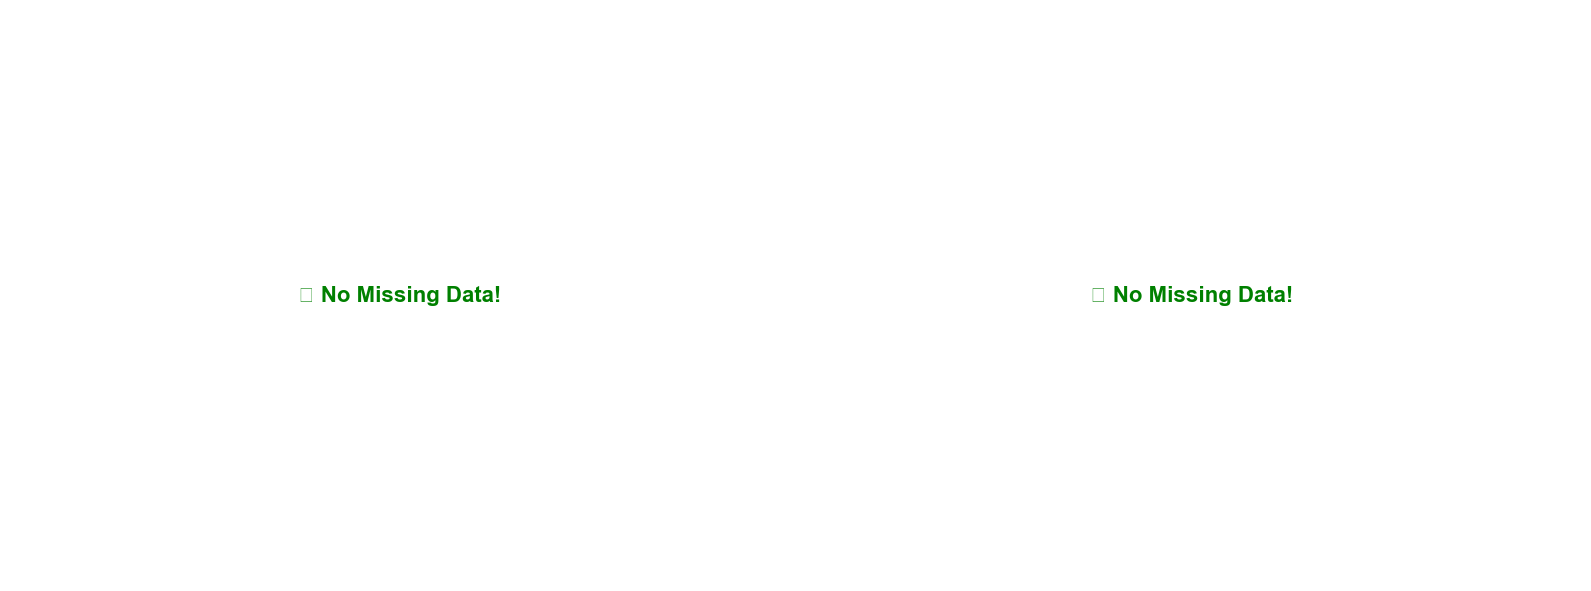


✓ Figure saved: docs/figures/01_missing_data_analysis.png


In [28]:
# Visualize Missing Data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
missing_plot = missing_analysis[missing_analysis['Missing_Count'] > 0].sort_values('Missing_Percent')
if len(missing_plot) > 0:
    axes[0].barh(missing_plot['Column'], missing_plot['Missing_Percent'], color='coral', edgecolor='black')
    axes[0].set_xlabel('Missing Data (%)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Features', fontsize=12, fontweight='bold')
    axes[0].set_title('Missing Data by Feature', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].axvline(x=5, color='orange', linestyle='--', linewidth=2, label='5% threshold')
    axes[0].axvline(x=20, color='red', linestyle='--', linewidth=2, label='20% threshold')
    axes[0].legend()
else:
    axes[0].text(0.5, 0.5, '✓ No Missing Data!', 
                 ha='center', va='center', fontsize=16, fontweight='bold', color='green')
    axes[0].axis('off')

# Heatmap
missing_matrix = df.isnull().head(100).T
if missing_matrix.sum().sum() > 0:
    sns.heatmap(missing_matrix, cbar=True, cmap='RdYlGn_r', ax=axes[1])
    axes[1].set_title('Missing Data Pattern (First 100 Rows)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Sample Index', fontsize=12)
    axes[1].set_ylabel('Features', fontsize=12)
else:
    axes[1].text(0.5, 0.5, '✓ No Missing Data!', 
                 ha='center', va='center', fontsize=16, fontweight='bold', color='green')
    axes[1].axis('off')

plt.tight_layout()
plt.savefig('../docs/figures/01_missing_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Figure saved: docs/figures/01_missing_data_analysis.png")


In [29]:
# Metadata Completeness Check
print("\n" + "="*70)
print("3.2 METADATA COMPLETENESS ASSESSMENT")
print("="*70)
# Check for critical features
critical_features = {
    'user_id': df.get('user_id', df.get('reviewerID', pd.Series())).notna().sum(),
    'item_id': df.get('parent_asin', df.get('asin', pd.Series())).notna().sum(),
    'rating': df.get('rating', pd.Series()).notna().sum(),
    'timestamp': df.get('timestamp', pd.Series()).notna().sum(),
    'text': df.get('text', pd.Series()).notna().sum(),
    'verified_purchase': df.get('verified_purchase', pd.Series()).notna().sum()
}

metadata_df = pd.DataFrame({
    'Feature': critical_features.keys(),
    'Available': critical_features.values(),
    'Coverage %': [v/len(df)*100 for v in critical_features.values()]
}).sort_values('Coverage %', ascending=False)

print("\nCritical Features Coverage:")
print(metadata_df.to_string(index=False))

# Determine metadata quality
metadata_score = metadata_df['Coverage %'].mean()
print(f"\n📊 Metadata Completeness Score: {metadata_score:.2f}%")

if metadata_score > 90:
    print("✓ EXCELLENT: All critical features well-covered")
elif metadata_score > 70:
    print("⚠️ GOOD: Some features missing, manageable")
else:
    print("🔴 POOR: Significant metadata gaps - consider data enrichment")



3.2 METADATA COMPLETENESS ASSESSMENT

Critical Features Coverage:
          Feature  Available  Coverage %
          user_id     701528       100.0
          item_id     701528       100.0
           rating     701528       100.0
        timestamp     701528       100.0
             text     701528       100.0
verified_purchase     701528       100.0

📊 Metadata Completeness Score: 100.00%
✓ EXCELLENT: All critical features well-covered


In [30]:
# Knowledge Limits Baseline (Out-of-Distribution Detection)
print("\n" + "="*70)
print("3.3 KNOWLEDGE LIMITS BASELINE")
print("="*70)
print("\n**Purpose:** Establish confidence thresholds for when model should abstain")
print("**Method:** Statistical analysis of feature distributions")

# Rating distribution (target variable)
if 'rating' in df.columns:
    rating_dist = df['rating'].value_counts(normalize=True).sort_index()
    
    print("\n📊 Rating Distribution (Target Variable):")
    for rating, pct in rating_dist.items():
        print(f"   Rating {rating}: {pct*100:.2f}% ({'█' * int(pct*50)})")
    
    # Identify rare classes (potential OOD)
    rare_threshold = 0.05
    rare_ratings = rating_dist[rating_dist < rare_threshold]
    
    if len(rare_ratings) > 0:
        print(f"\n⚠️ Rare Rating Classes (<{rare_threshold*100}%):")
        print(rare_ratings)
        print("\n💡 Recommendation: Model should flag predictions for these classes as low-confidence")



3.3 KNOWLEDGE LIMITS BASELINE

**Purpose:** Establish confidence thresholds for when model should abstain
**Method:** Statistical analysis of feature distributions

📊 Rating Distribution (Target Variable):
   Rating 1.0: 14.55% (███████)
   Rating 2.0: 6.13% (███)
   Rating 3.0: 8.03% (████)
   Rating 4.0: 11.32% (█████)
   Rating 5.0: 59.97% (█████████████████████████████)



3.4 OUTLIER DETECTION

Outlier Analysis (IQR Method):
     Feature  Outliers  Outlier %     Q1  Median     Q3  IQR
      rating         0   0.000000    3.0     5.0    5.0  2.0
helpful_vote     54372   7.750510    0.0     0.0    1.0  1.0
        year      6137   0.874805 2017.0  2019.0 2021.0  4.0
       month         0   0.000000    3.0     6.0    9.0  6.0


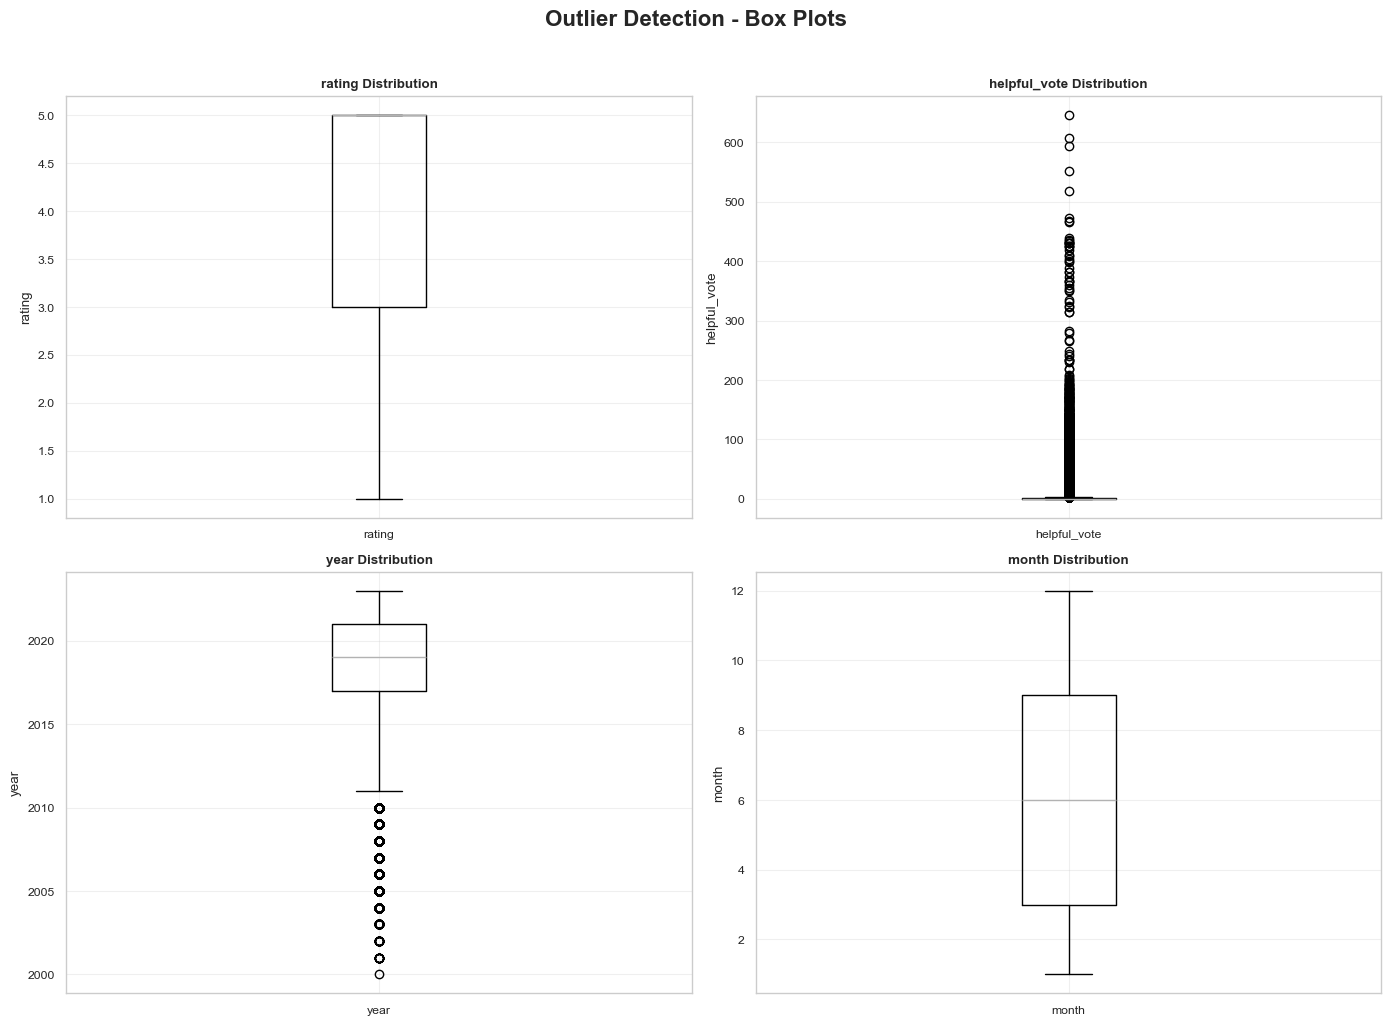


✓ Figure saved: docs/figures/02_outlier_detection.png


In [31]:
# Outlier Detection (Numerical Features)
print("\n" + "="*70)
print("3.4 OUTLIER DETECTION")
print("="*70)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns
numerical_cols = [col for col in numerical_cols if 'id' not in col.lower() and 'timestamp' not in col.lower()]

if len(numerical_cols) > 0:
    outlier_summary = []
    
    for col in numerical_cols[:5]:  # Analyze first 5 numerical features
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = len(outliers) / len(df) * 100
        
        outlier_summary.append({
            'Feature': col,
            'Outliers': len(outliers),
            'Outlier %': outlier_pct,
            'Q1': Q1,
            'Median': df[col].median(),
            'Q3': Q3,
            'IQR': IQR
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    print("\nOutlier Analysis (IQR Method):")
    print(outlier_df.to_string(index=False))
    
    # Visualization
    if len(numerical_cols) >= 4:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        for idx, col in enumerate(numerical_cols[:4]):
            df.boxplot(column=col, ax=axes[idx])
            axes[idx].set_title(f'{col} Distribution', fontweight='bold')
            axes[idx].set_ylabel(col)
            axes[idx].grid(alpha=0.3)
        
        plt.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.savefig('../docs/figures/02_outlier_detection.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Figure saved: docs/figures/02_outlier_detection.png")


In [32]:
# Data Trustworthiness Summary
print("\n" + "="*70)
print("SECTION 3 SUMMARY: DATA TRUSTWORTHINESS")
print("="*70)

trustworthiness_metrics = {
    'Overall Data Quality': f"{quality_score:.1f}/100",
    'Metadata Completeness': f"{metadata_score:.1f}%",
    'Missing Data': f"{missing_analysis['Missing_Percent'].mean():.2f}% avg",
    'Outlier Rate': f"{outlier_df['Outlier %'].mean():.2f}% avg" if len(numerical_cols) > 0 else "N/A",
    'Sample Size': f"{len(df):,}",
    'Temporal Coverage': f"{(df['date'].max() - df['date'].min()).days} days" if 'date' in df.columns else "N/A"
}

print("\n🎯 Key Metrics:")
for metric, value in trustworthiness_metrics.items():
    print(f"   {metric:<25}: {value}")

# Determine trustworthiness grade
if quality_score >= 90 and metadata_score >= 90:
    grade = "A (EXCELLENT)"
    color = "🟢"
elif quality_score >= 75 and metadata_score >= 75:
    grade = "B (GOOD)"
    color = "🟡"
elif quality_score >= 60:
    grade = "C (ACCEPTABLE)"
    color = "🟠"
else:
    grade = "D (POOR)"
    color = "🔴"

print(f"\n{color} Data Trustworthiness Grade: {grade}")

# Recommendations
print("\n💡 NIST Knowledge Limits Recommendations:")
if quality_score < 80:
    print("   ⚠️ Consider data cleaning/enrichment before modeling")
if rare_ratings is not None and len(rare_ratings) > 0:
    print("   ⚠️ Model should abstain from rare class predictions (confidence threshold)")
if metadata_score < 90:
    print("   ⚠️ Missing metadata may limit explainability quality")

print("\n✓ Section 3 complete: Data trustworthiness baseline established")
print("   Next: Section 4 - Fairness & Ethical AI Audit")


SECTION 3 SUMMARY: DATA TRUSTWORTHINESS

🎯 Key Metrics:
   Overall Data Quality     : 100.0/100
   Metadata Completeness    : 100.0%
   Missing Data             : 0.00% avg
   Outlier Rate             : 2.16% avg
   Sample Size              : 701,528
   Temporal Coverage        : 8346 days

🟢 Data Trustworthiness Grade: A (EXCELLENT)

💡 NIST Knowledge Limits Recommendations:

✓ Section 3 complete: Data trustworthiness baseline established
   Next: Section 4 - Fairness & Ethical AI Audit
